In [343]:
import numpy as np

class Two2dGaussianData(object):
    '''
    Dataset of two 2d gaussian as a toy binary classification
    '''
    def __init__(self):
        '''
        initialize data with 2000 data points for training, 
        200 data points for validiation, 200 data points for test 
        '''
        N = 2000
        x0 = np.random.randn(N, 2) + np.array([0.9, 0.9])
        x1 = np.random.randn(N, 2) + np.array([-0.9, -0.9])
        self.X = {}
        self.X["train"]=np.vstack((x0[0:1000], x1[0:1000]))
        self.X["val"]=np.vstack((x0[1000:1200], x1[1000:1200]))
        self.X["test"]=np.vstack((x0[1000:2000], x1[1000:2000]))
        y0=np.zeros(N)#.astype(np.int)
        y1=np.ones(N)#.astype(np.int)
        self.y={}
        self.y["train"]=np.hstack((y0[0:1000], y1[0:1000]))
        self.y["val"]=np.hstack((y0[1000:1200], y1[1000:1200]))
        self.y["test"]=np.hstack((y0[1000:2000], y1[1000:2000]))
        
    def get_batch(self,batch_size,mode):
        #get random batch
        num_all_data=len(self.X[mode])
        random_indices=np.random.choice(num_all_data, batch_size, replace=False)
        Xbatch=self.X[mode][random_indices]
        ybatch=self.y[mode][random_indices]

        return Xbatch,ybatch

In [344]:
gauss_sample = Two2dGaussianData()

In [345]:
train_batch= gauss_sample.get_batch(100, mode="train")
train_batch_X = train_batch[0]
# response vector 
train_batch_y = train_batch[1] 

In [346]:
def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 

In [347]:
train_batch_X = normalize(train_batch_X) 

In [348]:
train_batch_X= np.hstack((np.matrix(np.ones(train_batch_X.shape[0])).T, train_batch_X)) 

In [350]:
# initial beta values 
beta_train = np.matrix(np.zeros(train_batch_X.shape[1])) 

In [351]:
def logistic_func(beta, X): 
    ''' 
    logistic(sigmoid) function 
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 
  
  
def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc 

def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = logistic_func(beta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 
  
  
def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return beta, num_iter  

In [352]:
# beta values after running gradient descent 
beta_train, num_iter = grad_desc(train_batch_X, train_batch_y, beta_train) 
# estimated beta values and number of iterations 
print("Estimated regression coefficients:", beta_train) 
print("No. of iterations:", num_iter) 

Estimated regression coefficients: [[ 10.23433359 -10.8145039   -8.0709481 ]]
No. of iterations: 1376


In [371]:
def pred_values(beta,X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 

In [372]:
 y_pred_train = pred_values(beta_train, train_batch_X) 

In [373]:
import matplotlib.pyplot as plt 
def plot_reg(X, y, beta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 
      

Correctly predicted labels: 93


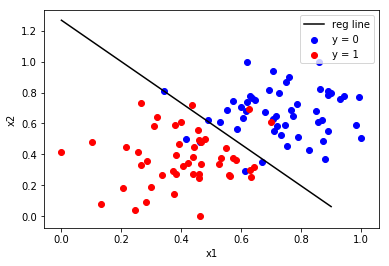

In [374]:
# number of correctly predicted labels 
print("Correctly predicted labels:", np.sum(train_batch_y == y_pred_train)) 
      
# plotting regression line 
plot_reg(train_batch_X, train_batch_y, beta_train) 

In [375]:
validation_batch= gauss_sample.get_batch(100, mode="val")
validation_batch_X = validation_batch[0]
# response vector 
validation_batch_y = validation_batch[1] 

In [376]:
valdation_batch_X = normalize(validation_batch_X) 

In [377]:
validation_batch_X= np.hstack((np.matrix(np.ones(validation_batch_X.shape[0])).T, validation_batch_X))

In [378]:
beta_validation = np.matrix(np.zeros(validation_batch_X.shape[1])) 

In [379]:
# beta values after running gradient descent 
beta_validation, num_iter = grad_desc(validation_batch_X, validation_batch_y, beta_validation) 
# estimated beta values and number of iterations 
print("Estimated regression coefficients:", beta_validation) 
print("No. of iterations:", num_iter) 

Estimated regression coefficients: [[-0.02463997 -1.34444581 -1.62652692]]
No. of iterations: 45


In [380]:
y_pred_validation = pred_values(beta_validation, validation_batch_X) 

Correctly predicted labels: 89


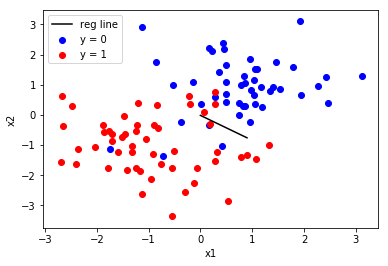

In [385]:
# number of correctly predicted labels 
print("Correctly predicted labels:", np.sum(validation_batch_y == y_pred_validation)) 
      
# plotting regression line 
plot_reg(validation_batch_X, validation_batch_y, beta_validation) 

In [382]:
test_batch= gauss_sample.get_batch(100, mode="test")
test_batch_X = test_batch[0]
# response vector 
test_batch_y = test_batch[1] 

In [383]:
test_batch_X = normalize(test_batch_X) 

In [384]:
test_batch_X= np.hstack((np.matrix(np.ones(test_batch_X.shape[0])).T, test_batch_X))

In [367]:
beta_test = np.matrix(np.zeros(test_batch_X.shape[1])) 

In [368]:
# beta values after running gradient descent 
beta_test, num_iter = grad_desc(test_batch_X, test_batch_y, beta_test) 
# estimated beta values and number of iterations 
print("Estimated regression coefficients:", beta_test) 
print("No. of iterations:", num_iter) 

Estimated regression coefficients: [[ 12.40388823  -8.94060183 -12.92532062]]
No. of iterations: 1885


In [369]:
y_pred_test = pred_values(beta_test, test_batch_X) 

Correctly predicted labels: 49


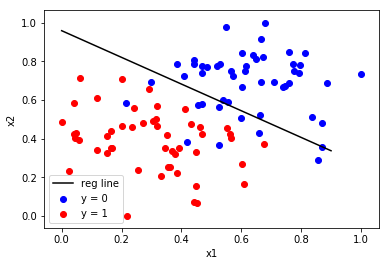

In [386]:
# number of correctly predicted labels 
print("Correctly predicted labels:", np.sum(test_batch_y == y_pred_test)) 
      
# plotting regression line 
plot_reg(test_batch_X, test_batch_y, beta_test) 